In [1]:
# Import Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import seaborn as sns

In [2]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data exploratory

In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# Several collumn are type object we need to transform them to get int or float type
# Reviews column has values where million are express as 'M'

In [6]:
# we often go error specific to row 10472
# we can see that the data doesn't make any sense
# we can remove it
display(df.iloc[10472])
df.drop(10472,inplace=True)

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [7]:
# df.Reviews = pd.to_numeric(df.Reviews.str.replace(".","").str.replace("M","000000"))
# df.Size = pd.to_numeric(df.Size.str.replace("M","000000").str.replace("k","000").str.replace("+","").str.replace(",","").str.replace("Varies with device",""))
# df.Installs = pd.to_numeric(df.Installs.str.replace(",","").str.replace("+",""))
# df.Price = pd.to_numeric(df.Price.str.replace("$",""))

In [8]:
def numeric(col:pd.Series) -> pd.Series:
    string_replace = {".":"",
                      "M":"000000",
                      "k":"000",
                      "+":"",
                      ",":"",
                      "Varies with device":"",
                      "$":""}
    for string in string_replace:
        col = col.str.replace(string,string_replace[string])
    return pd.to_numeric(col)

In [9]:
cols = ["Reviews","Size","Installs","Price"]
for col in cols:
    df[col] = numeric(df[col])
    
df["Last Updated"] = pd.to_datetime(df["Last Updated"])
df["Size"] = df["Size"] / 1000000
df["Reviews"] = df["Reviews"] / 1000
df["Price"] = df["Price"] / 100

df.rename(columns={"Size":"Size(M)","Reviews":"Reviews(k)"})

df.info()

/tmp/ipykernel_5647/4294495753.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col = col.str.replace(string,string_replace[string])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  float64       
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.2+ MB


In [10]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [11]:
df["Current Ver"].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [12]:
df.isnull().sum()
# Null values in Size is do to "Varies with device"
# We need to explore Rating missing values

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [13]:
df[df.Rating.isnull()].describe()
# There are mostly low value of reviews with a mean of 18.

,Rating,Reviews,Size,Installs,Price
count,0.0,1474.000000,1416.000000,1474.000000,1474.000000
mean,NaN,0.018062,34.581369,4053.968114,1.449539
std,NaN,0.139912,23.777228,40795.975992,16.770343
min,NaN,0.000000,0.018000,0.000000,0.000000
25%,NaN,0.000000,17.000000,10.000000,0.000000
50%,NaN,0.001000,28.000000,100.000000,0.000000
75%,NaN,0.005000,47.000000,500.000000,0.000000
max,NaN,3.248000,100.000000,1000000.000000,399.990000


# What are the most popular types of apps on the Google Play Store? Has this changed over time?

In [14]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [15]:
display(df.Category.unique())
len(df.Category.unique())

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

33

<AxesSubplot:>

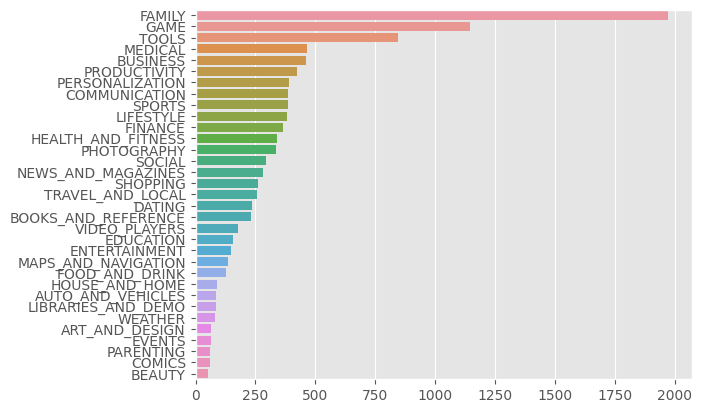

In [16]:
categories = df.Category.value_counts().index
counts = df.Category.value_counts().values
sns.barplot(x=counts, y=categories)


In [17]:
counts

array([1972, 1144,  843,  463,  460,  424,  392,  387,  384,  382,  366,
        341,  335,  295,  283,  260,  258,  234,  231,  175,  156,  149,
        137,  127,   88,   85,   85,   82,   65,   64,   60,   60,   53])

In [18]:
df["Year"] = df["Last Updated"].dt.year

In [19]:
categories = df.Category.value_counts().index
counts = df.Category.value_counts().values


Text(0.5, 0.98, 'Top five apps from 2013 to 2018')

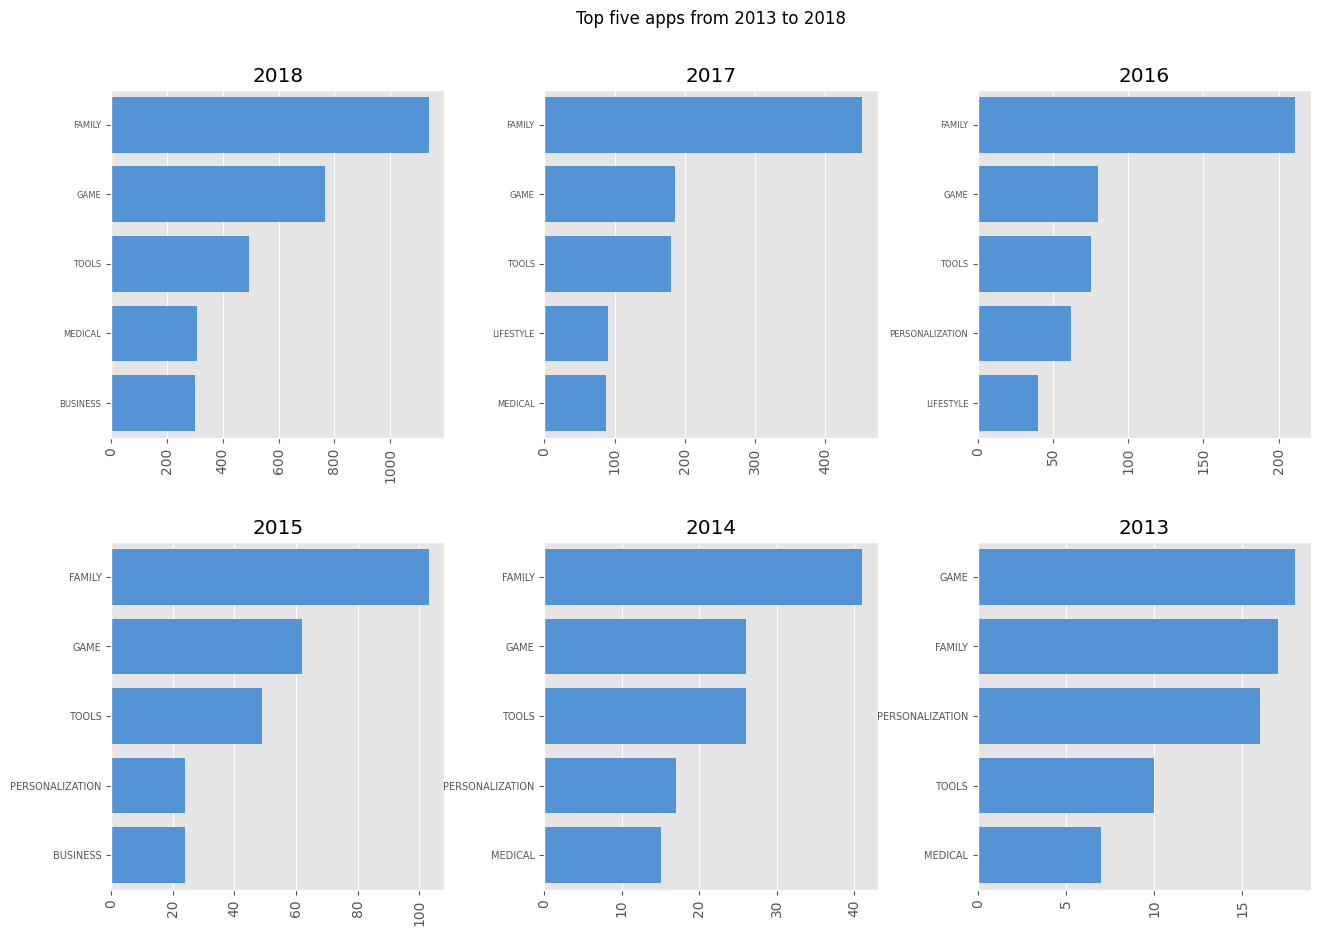

In [20]:
fig,(ax1,ax2) = plt.subplots(2,3,figsize=(15,10))
years = sorted(df.Year.unique(),reverse=True)
for ax,year in zip(ax1,years[:3]):
    counted_values = df[df.Year == year]["Category"].value_counts()[:5]
    categories = counted_values.index
    counts = counted_values.values
    sns.barplot(x=counts,y=categories,ax=ax,color="#3f92eb")
    ax.set_title(year)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_yticklabels(labels=categories,fontsize=6)
for ax,year in zip(ax2,years[3:7]):
    counted_values = df[df.Year == year]["Category"].value_counts()[:5]
    categories = counted_values.index
    counts = counted_values.values
    sns.barplot(x=counts,y=categories,ax=ax,color="#3f92eb")
    ax.set_title(year)
    ax.tick_params(axis='x', labelrotation=90,)
    ax.set_yticklabels(labels=categories,fontsize=7)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.suptitle("Top five apps from 2013 to 2018")


In [21]:
# We can see that already game and family where above the rest of the apps, and tools when from 4th to 3th in 2014

In [30]:
avg_install = df.groupby("Category")[["Installs"]].mean()
avg_install.Installs = avg_install.Installs / 1000
avg_install.rename(columns={"Installs":"Installs(k)"},inplace=True)
avg_install.sort_values("Installs(k)",ascending=False,inplace=True)


<AxesSubplot:xlabel='Installs(k)', ylabel='Category'>

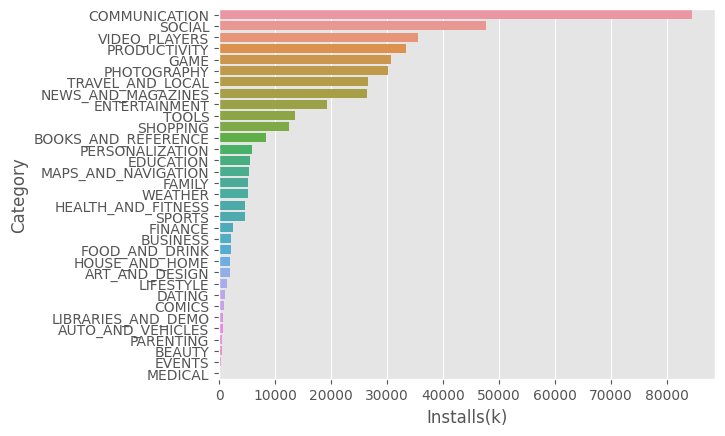

In [31]:
categories = avg_install.index
counts = avg_install["Installs(k)"]
sns.barplot(x=counts, y=categories)

# How do app ratings and reviews vary by category, and what factors are associated with higher or lower ratings?

In [23]:
# what is the average rating
df.Rating.describe()
# App are in general well rated.

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [24]:
rating_df = df[df.Rating.notnull()]

In [25]:
rating_df.shape

(9366, 14)

In [38]:
mean_rating_cat = rating_df.groupby('Category').agg({"Rating":"mean","Installs":"mean","Size":"mean","Reviews":"mean","Price":"mean","Category":"count"})
mean_rating_cat = mean_rating_cat.sort_values("Rating")
worst_best = pd.concat([mean_rating_cat[:5],mean_rating_cat[-5:]],axis=0)

,Rating,Installs,Size,Reviews,Price,Category
Category,,,,,,
DATING,3.970769,1.355360e+06,38.086705,37.389944,0.117744,195
TOOLS,4.047411,1.560044e+07,32.478101,372.185515,0.283243,734
MAPS_AND_NAVIGATION,4.051613,5.840867e+06,38.556211,247.250484,0.217339,124
VIDEO_PLAYERS,4.063750,3.888686e+07,36.049828,689.873075,0.065375,160
LIFESTYLE,4.094904,1.711978e+06,37.620436,41.024742,6.244841,314
TRAVEL_AND_LOCAL,4.109292,3.039318e+07,37.406363,277.069788,0.165885,226
BUSINESS,4.121452,3.306165e+06,36.881236,46.053089,0.245512,303
ENTERTAINMENT,4.126174,1.925611e+07,31.133333,397.168819,0.053557,149
FINANCE,4.131889,2.713970e+06,35.828459,54.335622,7.553777,323


In [33]:
worst_best

,Rating,Size,Reviews,Price,Category
Category,,,,,
DATING,3.970769,38.086705,37.389944,0.117744,195
TOOLS,4.047411,32.478101,372.185515,0.283243,734
MAPS_AND_NAVIGATION,4.051613,38.556211,247.250484,0.217339,124
VIDEO_PLAYERS,4.063750,36.049828,689.873075,0.065375,160
LIFESTYLE,4.094904,37.620436,41.024742,6.244841,314
PERSONALIZATION,4.335987,37.259639,284.540812,0.406879,314
BOOKS_AND_REFERENCE,4.346067,39.467500,123.363258,0.134157,178
ART_AND_DESIGN,4.358065,38.118644,27.651161,0.096290,62
EDUCATION,4.389032,34.318927,255.451677,0.115871,155
